 ## Swiss Real-Estate Analysis — Progressive Jupyter Project

This notebook is structured as a progressive project (numbered steps/cells) so you can follow along like a tutorial and run each section one at a time.

Files included (uploaded by you):

- `SQL_Query_Swiss_Housing_Property_.sql` (sample MS SQL queries)
- `Data_swiss_property_investment_city_.xlsx` (dataset in Excel)

**How to use**: run the cells in order. Cells are numbered (1, 2, 3...).

In [1]:
# Install packages if you don't have them. Uncomment the lines to install.

# !pip install sqlalchemy pandasql openpyxl

import os
import sqlite3
import pandas as pd
from sqlalchemy import create_engine

print('Python modules loaded. Current working dir:', os.getcwd())

Python modules loaded. Current working dir: C:\Users\leonb\Jupyter Pro


In [2]:
import os
import pandas as pd

# ✅ Use your correct Windows path — note the double backslashes \\ or use a raw string (r"...")
file_path = r"C:\Users\leonb\Downloads\Data_swiss_property_investment_city_.xlsx"

if os.path.exists(file_path):
    df = pd.read_excel(file_path)
    display(df.head())
    print('\nShape:', df.shape)
else:
    print('File not found at', file_path)

,Property_Price,Rooms,Living_space,Location,Annual Rental Income
0,900000.0,4.5 rooms,119m² living space,"Bernstrasse 217, 3000 Bern",32400
1,1150000.0,3.5 rooms,83m² living space,"Röttelerstrasse 2, 4058 Basel",46000
2,1550000.0,3.5 rooms,90m² living space,"Riedackerstrasse 11, 8051 Zürich",54250
3,2260000.0,5.5 rooms,136m² living space,"Probusweg 2, 8057 Zürich",79100
4,1960000.0,4.5 rooms,93m² living space,"Limmattalstrasse 281, 8049 Zürich",68600



Shape: (794, 5)


In [4]:
# 3 — Inspect and Clean the Dataset

try:
    # Basic info about the DataFrame
    print("📊 Dataset Info:")
    print("-" * 60)
    df_info = df.info()

    # Summary of missing values
    print("\n🧹 Missing Values Summary:")
    print("-" * 60)
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "✅ No missing values detected.")
    
    # Quick descriptive stats for numeric columns
    print("\n📈 Descriptive Statistics (numeric columns):")
    print("-" * 60)
    display(df.describe())

    # Show unique counts for non-numeric (categorical) columns
    print("\n🔤 Unique Value Counts (categorical columns):")
    print("-" * 60)
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        print(f"{col}: {df[col].nunique()} unique values")

except NameError:
    print("⚠️ DataFrame `df` not loaded. Please run cell 2 (Load Excel) first.")
except Exception as e:
    print(f"❌ An error occurred while inspecting the dataset: {e}")


📊 Dataset Info:
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Property_Price        793 non-null    float64
 1   Rooms                 749 non-null    object 
 2   Living_space          710 non-null    object 
 3   Location              779 non-null    object 
 4   Annual Rental Income  789 non-null    object 
dtypes: float64(1), object(4)
memory usage: 31.1+ KB

🧹 Missing Values Summary:
------------------------------------------------------------
Property_Price           1
Rooms                   45
Living_space            84
Location                15
Annual Rental Income     5
dtype: int64

📈 Descriptive Statistics (numeric columns):
------------------------------------------------------------


,Property_Price
count,7.930000e+02
mean,2.927549e+06
std,1.164437e+07
min,7.900000e+04
25%,1.190000e+06
50%,1.755000e+06
75%,2.750000e+06
max,2.280000e+08



🔤 Unique Value Counts (categorical columns):
------------------------------------------------------------
Rooms: 29 unique values
Living_space: 242 unique values
Location: 373 unique values
Annual Rental Income: 530 unique values


In [5]:
# 4 — Create SQLite Database and Load DataFrame

import os
import sqlite3
import pandas as pd

# ✅ Paths — updated for Windows
excel_file = r"C:\Users\leonb\Downloads\Data_swiss_property_investment_city_.xlsx"
sql_file = r"C:\Users\leonb\Downloads\SQL_Query_Swiss_Housing_Property_.sql"
sqlite_db = r"C:\Users\leonb\Downloads\swiss_real_estate.db"

# ✅ Create SQLite connection in your Downloads folder
try:
    conn = sqlite3.connect(sqlite_db)
    print(f"✅ SQLite database created or connected at: {sqlite_db}")
except Exception as e:
    print(f"❌ Error creating database: {e}")

# ✅ Load the DataFrame into the SQLite DB
try:
    if 'df' in globals():
        df.to_sql('Swiss_real_estate_property', conn, if_exists='replace', index=False)
        print("✅ Table written to SQLite as 'Swiss_real_estate_property'")
    else:
        print("⚠️ DataFrame 'df' not found. Please run cell #2 first.")
except Exception as e:
    print(f"❌ Error writing table to SQLite: {e}")

# ✅ Quick verification — count rows in the table
try:
    q = "SELECT COUNT(*) as cnt FROM Swiss_real_estate_property;"
    result = pd.read_sql_query(q, conn)
    print("\n📊 Table Row Count:")
    print(result)
except Exception as e:
    print(f"❌ Error verifying table: {e}")

# ✅ Optional — Read and preview your SQL query file (just to confirm it's accessible)
try:
    with open(sql_file, "r", encoding="latin-1") as f:
        sql_preview = f.read(500)  # read first 500 chars
    print("\n🧾 SQL Query File Loaded Successfully — Preview:")
    print(sql_preview, "...")
except FileNotFoundError:
    print(f"⚠️ SQL file not found at: {sql_file}")
except Exception as e:
    print(f"❌ Error reading SQL file: {e}")

✅ SQLite database created or connected at: C:\Users\leonb\Downloads\swiss_real_estate.db
✅ Table written to SQLite as 'Swiss_real_estate_property'

📊 Table Row Count:
   cnt
0  794

🧾 SQL Query File Loaded Successfully — Preview:
SELECT 
    Location,
    Property_Price,
    [Annual Rental Income],
    CAST(([Annual Rental Income] * 100.0 / Property_Price) AS DECIMAL(10,2)) AS Gross_Rental_Yield_Percent
FROM 
    [dbo].[Swiss_real-estate_property]
WHERE 
    Location LIKE '%Basel%';

SELECT 
    SUM([Annual Rental Income]) * 100.0 / SUM(Property_Price) AS Overall_Gross_Rental_Yield_Percent
FROM 
    [dbo].[Swiss_real-estate_property]
WHERE 
    Location LIKE '%Basel%';


SELECT 
    Location,
    Property_Price,
    [Ann ...


In [6]:
# 5 — Run sample SQL (SQLite-adapted, robust + auto-detect columns)

import sqlite3
import pandas as pd

# Path to your SQLite DB (update if you used a different path in cell #4)
sqlite_db = r"C:\Users\leonb\Downloads\swiss_real_estate.db"

# Connect (or reuse existing connection if present)
try:
    conn
except NameError:
    conn = sqlite3.connect(sqlite_db)

# Helper: get column names from the table
def get_table_columns(connection, table_name="Swiss_real_estate_property"):
    try:
        info = pd.read_sql_query(f"PRAGMA table_info('{table_name}');", connection)
        return list(info['name'])
    except Exception:
        return []

cols = get_table_columns(conn, "Swiss_real_estate_property")
print("📋 Columns found in Swiss_real_estate_property:\n", cols)

# Auto-detect likely column names for property price and annual rental income
def find_best_column(columns, keywords_list):
    lc = [c.lower() for c in columns]
    for keywords in keywords_list:
        for i, c in enumerate(lc):
            if all(k in c for k in keywords):
                return columns[i]
    return None

# candidate keyword sets (ordered by preference)
price_candidates = [
    ['property','price'],
    ['price'],
    ['price','chf'],
    ['sale','price']
]

rental_candidates = [
    ['annual','rental'],
    ['annual','income'],
    ['rental','income'],
    ['annual'],
    ['rental']
]

price_col = find_best_column(cols, price_candidates)
rental_col = find_best_column(cols, rental_candidates)

if not price_col or not rental_col:
    print("\n⚠️ Could not confidently detect both price and annual rental columns.")
    print("If automatic detection failed, please set `price_col` and `rental_col` manually from the column list above.")
    # show a small preview to help user choose
    try:
        preview = pd.read_sql_query("SELECT * FROM Swiss_real_estate_property LIMIT 5;", conn)
        display(preview)
    except Exception as e:
        print("Error previewing table:", e)
else:
    print(f"\n✅ Using columns -> price: '{price_col}', rental: '{rental_col}'\n")

    # Build a safe SQLite query (handles NULL / zero prices)
    # We wrap column names in double quotes to handle spaces/special chars.
    query_sqlite = f'''
    SELECT
        "Location",
        "{price_col}" AS Property_Price,
        "{rental_col}" AS Annual_Rental_Income,
        CASE
            WHEN "{price_col}" IS NULL OR "{price_col}" = 0 THEN NULL
            ELSE ROUND( ("{rental_col}" * 100.0 / "{price_col}"), 2 )
        END AS Gross_Rental_Yield_Percent
    FROM Swiss_real_estate_property
    WHERE Location LIKE '%Basel%'
    LIMIT 100;
    '''

    # Run the query and show results
    try:
        res = pd.read_sql_query(query_sqlite, conn)
        if res.empty:
            print("⚠️ Query returned 0 rows. Check the Location values or remove the WHERE clause to preview more data.")
            # show top 10 rows for debugging
            display(pd.read_sql_query('SELECT Location, "{0}", "{1}" FROM Swiss_real_estate_property LIMIT 10;'.format(price_col, rental_col), conn))
        else:
            display(res.head(20))
            print('\nReturned rows:', res.shape[0])
    except Exception as e:
        print('❌ Error running query:', e)


📋 Columns found in Swiss_real_estate_property:
 ['Property_Price', 'Rooms', 'Living_space', 'Location', 'Annual Rental Income']

✅ Using columns -> price: 'Property_Price', rental: 'Annual Rental Income'



,Location,Property_Price,Annual_Rental_Income,Gross_Rental_Yield_Percent
0,"Röttelerstrasse 2, 4058 Basel",1150000.0,46000,4.00
1,"Mittlere Strasse 148, 4056 Basel",2230000.0,89200,4.00
2,"Bartenheimerstrasse, 4055 Basel",575000.0,23000,4.00
3,4058 Basel,450000.0,18000,4.00
4,"Basel, 4053 Basel",1490000.0,59600,4.00
5,"Basel, 4054 Basel",1595000.0,63800,4.00
6,4055 Basel,855000.0,34200,4.00
7,"Neuweilerstrasse 101, 4054 Basel",995000.0,39800,4.00
8,"Hauensteinstrasse 92, 4059 Basel",495000.0,19800,4.00
9,"Falkensteinerstrasse 54, 4053 Basel",1700000.0,68000,4.00



Returned rows: 100


,Location,Num_Properties,Avg_Price,Avg_Annual_Rental_Income
0,"Rue de l'Athénée 36, 1206 Genf",1,2.280000e+08,56000.00
1,"Athénée,Marignac,Contamines, 1206 Genève",1,2.280000e+08,9120000.00
2,"1205 Geneva, Switzerland",1,3.500000e+07,1400000.00
3,"Avenue de Budé 0, 1206 Genf",1,3.108600e+07,74700.00
4,"Privatstrasse, 8038 Zürich",1,2.000000e+07,480000.00
5,8037 Zürich,1,1.550000e+07,620000.00
6,"Aarbergergasse 12, 3011 Bern",1,7.700000e+06,277200.00
7,"Rue des Granges 16, 1204 Genève",4,7.117500e+06,282100.00
8,8038 Zürich,3,7.113333e+06,86300.00
9,"Freiestrasse 54 + 54a, 3012 Bern",1,6.900000e+06,276000.00


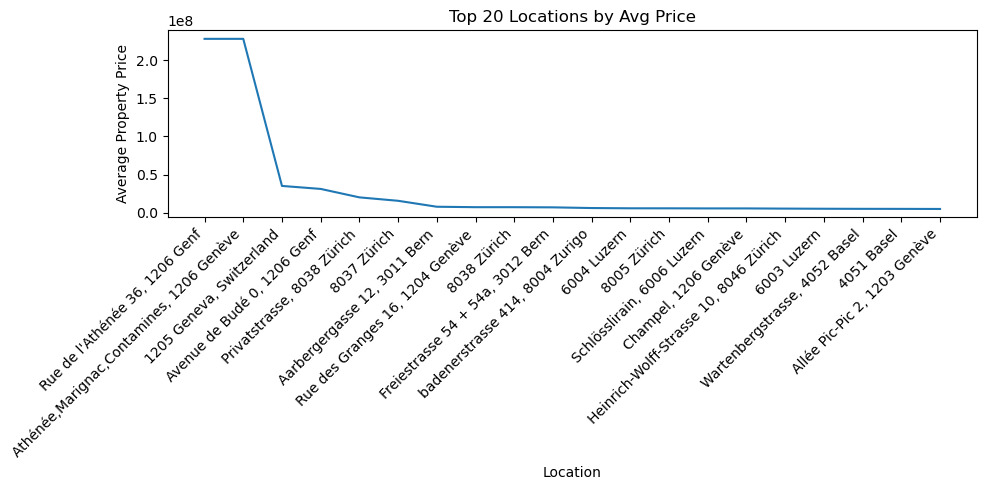

In [7]:
# 6a — Aggregations
try:
    agg = pd.read_sql_query('''
        SELECT Location, 
               COUNT(*) AS Num_Properties,
               ROUND(AVG(Property_Price), 2) AS Avg_Price,
               ROUND(AVG("Annual Rental Income"), 2) AS Avg_Annual_Rental_Income
        FROM Swiss_real_estate_property
        GROUP BY Location
        ORDER BY Avg_Price DESC
        LIMIT 20;
    ''', conn)
    display(agg)
except Exception as e:
    print('Error in aggregation:', e)

# 6b — Simple plot example (matplotlib). Run in Jupyter to see the chart.
try:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(agg['Location'], agg['Avg_Price'])
    plt.xticks(rotation=45, ha='right')
    plt.title('Top 20 Locations by Avg Price')
    plt.xlabel('Location')
    plt.ylabel('Average Property Price')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Plotting error (maybe no agg data):', e)

In [10]:
# 8 — Export Example (Windows-friendly, verified) — REPLACEMENT CELL
import os
import pandas as pd
import sqlite3

# Paths (use raw strings to avoid backslash escaping issues)
sqlite_db = r"C:\Users\leonb\Downloads\swiss_real_estate.db"
export_path = r"C:\Users\leonb\Downloads\swiss_sample_export.csv"

# Check DB file exists
if not os.path.exists(sqlite_db):
    print("❌ SQLite database not found at:", sqlite_db)
    print("Please run the cell that creates it first (cell #4).")
else:
    try:
        # Connect (reuse existing `conn` if present, otherwise open new)
        try:
            conn  # reference existing connection
        except NameError:
            conn = sqlite3.connect(sqlite_db)

        # List tables to verify the target table exists
        tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
        table_names = tables['name'].values.tolist()

        if "Swiss_real_estate_property" not in table_names:
            print("⚠️ Table 'Swiss_real_estate_property' not found in the database.")
            print("Please load the data first (see cell #4).")
            # Show available tables to help debug
            print("Existing tables:", table_names)
        else:
            # Read up to 100 rows and export to CSV with UTF-8-SIG so Excel renders special chars
            out = pd.read_sql_query("SELECT * FROM Swiss_real_estate_property LIMIT 100;", conn)
            out.to_csv(export_path, index=False, encoding="utf-8-sig")

            print("✅ Export successful!")
            print("Saved file to:", export_path)
            print("Exported rows:", len(out))
            print("\nPreview of exported data:")
            display(out.head())

    except Exception as e:
        print("❌ Export error:", e)

✅ Export successful!
Saved file to: C:\Users\leonb\Downloads\swiss_sample_export.csv
Exported rows: 100

Preview of exported data:


,Property_Price,Rooms,Living_space,Location,Annual Rental Income
0,900000.0,4.5 rooms,119m² living space,"Bernstrasse 217, 3000 Bern",32400
1,1150000.0,3.5 rooms,83m² living space,"Röttelerstrasse 2, 4058 Basel",46000
2,1550000.0,3.5 rooms,90m² living space,"Riedackerstrasse 11, 8051 Zürich",54250
3,2260000.0,5.5 rooms,136m² living space,"Probusweg 2, 8057 Zürich",79100
4,1960000.0,4.5 rooms,93m² living space,"Limmattalstrasse 281, 8049 Zürich",68600
